##Задание 1

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import cmath

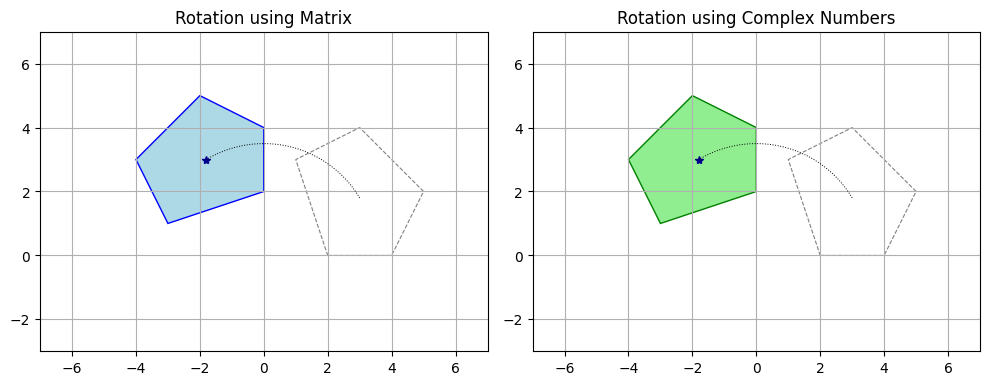

In [6]:
def plot_polygon(ax, original_vertices, rotated_vertices, color_edge, color_face, center_mass, title):
    # Исходный
    original_polygon = mpatches.Polygon(original_vertices, edgecolor='gray', facecolor='none', linestyle='--', linewidth=0.8)
    ax.add_patch(original_polygon)

    # Повернутый
    rotated_polygon = mpatches.Polygon(rotated_vertices, edgecolor=color_edge, facecolor=color_face)
    ax.add_patch(rotated_polygon)

    # центр масс
    ax.plot(center_mass[0], center_mass[1], marker='*', markersize=6, color='darkblue')

    # оси
    ax.set_xlim(-7, 7)
    ax.set_ylim(-3, 7)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.grid(True)


def rotate_polygon_matrix(vertices, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return vertices @ rotation_matrix.T

def rotate_polygon_complex(vertices, angle):
    rotated_points = []
    for x, y in vertices:
        z = complex(x, y)
        z_rot = z * cmath.exp(1j * angle)
        rotated_points.append((z_rot.real, z_rot.imag))
    return np.array(rotated_points)

original_points = [(2, 0), (4, 0), (5, 2), (3, 4), (1, 3)]
vertices = np.array(original_points)

centroid = np.mean(vertices, axis=0)

angle_rad = np.pi / 2  # 90 градусов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

rotated_vertices_matrix = rotate_polygon_matrix(vertices, angle_rad)
centroid_rotated_matrix = np.mean(rotated_vertices_matrix, axis=0)
plot_polygon(ax1, vertices, rotated_vertices_matrix, 'blue', 'lightblue', centroid_rotated_matrix, 'Rotation using Matrix')

rotated_vertices_complex = rotate_polygon_complex(vertices, angle_rad)
centroid_rotated_complex = np.mean(rotated_vertices_complex, axis=0)
plot_polygon(ax2, vertices, rotated_vertices_complex, 'green', 'lightgreen', centroid_rotated_complex, 'Rotation using Complex Numbers')

# дуга вращения центра тяжести
theta_start = np.arctan2(centroid[1], centroid[0])
theta_end_matrix = np.arctan2(centroid_rotated_matrix[1], centroid_rotated_matrix[0])
theta_end_complex = np.arctan2(centroid_rotated_complex[1], centroid_rotated_complex[0])
radius = np.linalg.norm(centroid)

theta_arc_matrix = np.linspace(theta_start, theta_end_matrix, 100)
theta_arc_complex = np.linspace(theta_start, theta_end_complex, 100)

x_arc_matrix = radius * np.cos(theta_arc_matrix)
y_arc_matrix = radius * np.sin(theta_arc_matrix)
x_arc_complex = radius * np.cos(theta_arc_complex)
y_arc_complex = radius * np.sin(theta_arc_complex)

ax1.plot(x_arc_matrix, y_arc_matrix, 'k:', linewidth=0.7)
ax2.plot(x_arc_complex, y_arc_complex, 'k:', linewidth=0.7)

plt.tight_layout()
plt.show()


##Задание 2

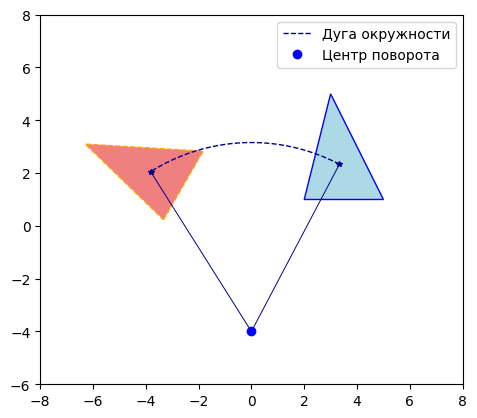

In [10]:
def rotate_polygon_matrix(arr_points, theta, rotation_centre):
    arr_points_temp = np.array(arr_points) - np.array(rotation_centre)
    matrix_rotate = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    arr_points_rotated = arr_points_temp @ matrix_rotate.T
    arr_points_rotated += np.array(rotation_centre)
    return arr_points_rotated

def rotate_polygon_complex(arr_points, theta, rotation_centre):
    rotated_vertices = []
    for x, y in arr_points:
        z = complex(x - rotation_centre[0], y - rotation_centre[1])
        z_rotated = z * np.exp(1j * theta)
        rotated_vertices.append((z_rotated.real + rotation_centre[0], z_rotated.imag + rotation_centre[1]))
    return rotated_vertices

theta = np.deg2rad(60)
fig03 = plt.figure()
ax03 = fig03.add_subplot(1, 1, 1)
arr_points = [(2, 1), (5, 1), (3, 5)]

polygon = mpatches.Polygon(arr_points, edgecolor='blue', facecolor='lightblue')
ax03.add_patch(polygon)

rotation_centre = (0, -4)

arr_points_rotated_matrix = rotate_polygon_matrix(arr_points, theta, rotation_centre)

polygon_rotated_matrix = mpatches.Polygon(arr_points_rotated_matrix, edgecolor='orange', facecolor='lightcoral', linestyle='--')
ax03.add_patch(polygon_rotated_matrix)

# arr_points_rotated_complex = rotate_polygon_complex(arr_points, theta, rotation_centre)
# polygon_rotated_complex = mpatches.Polygon(arr_points_rotated_complex, edgecolor='green', facecolor='lightgreen', linestyle='--')
# ax03.add_patch(polygon_rotated_complex)

center_of_mass = np.mean(arr_points, axis=0)
center_of_mass_rotated = np.mean(arr_points_rotated_matrix, axis=0)

ax03.plot([rotation_centre[0], center_of_mass[0]], [rotation_centre[1], center_of_mass[1]], linewidth=0.7, c='darkblue', linestyle='solid')
ax03.plot([rotation_centre[0], center_of_mass_rotated[0]], [rotation_centre[1], center_of_mass_rotated[1]], linewidth=0.7, c='darkblue', linestyle='solid')

ax03.plot(center_of_mass[0], center_of_mass[1], marker='*', markersize=4, c='darkblue')
ax03.plot(center_of_mass_rotated[0], center_of_mass_rotated[1], marker='*', markersize=4, c='darkblue')

# Углы от центра вращения до центров масс до и после поворота
theta1 = np.arctan2(center_of_mass[1] - rotation_centre[1], center_of_mass[0] - rotation_centre[0])
theta2 = np.arctan2(center_of_mass_rotated[1] - rotation_centre[1], center_of_mass_rotated[0] - rotation_centre[0])

# Генерация углов
theta_linespace = np.linspace(theta1, theta2, 100)

radius = np.linalg.norm(np.array(center_of_mass) - np.array(rotation_centre))

# Kоординаты дуги окружности
x_arc = rotation_centre[0] + radius * np.cos(theta_linespace)
y_arc = rotation_centre[1] + radius * np.sin(theta_linespace)

ax03.plot(x_arc, y_arc, '--', c='darkblue', linewidth=1, label='Дуга окружности')

ax03.plot(*rotation_centre, 'bo', label='Центр поворота')

ax03.set_xlim(-8, 8)
ax03.set_ylim(-6, 8)
ax03.set_aspect('equal')
ax03.legend()

plt.show()


##Задание 3

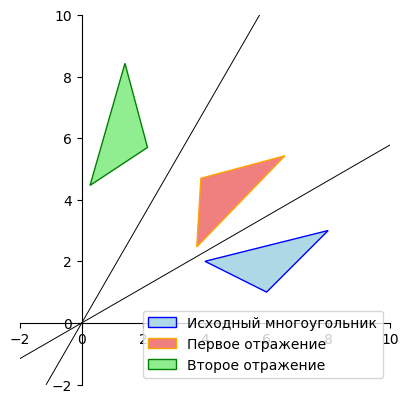

In [17]:
import math

def reflect_polygon(points, theta):
    reflection_matrix = np.array([[np.cos(theta), np.sin(theta)], [np.sin(theta), -np.cos(theta)]])
    return points @ reflection_matrix.T

def draw_polygon(ax, points, edgecolor, facecolor, label=None):
    polygon = mpatches.Polygon(points, edgecolor=edgecolor, facecolor=facecolor, label=label)
    ax.add_patch(polygon)

def setup_axes():
    fig, ax = plt.subplots()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    return fig, ax

def draw_reflection_lines(ax, theta1, theta2):
    ax.axline((0, 0), slope=math.tan(theta1 / 2), color="black", linewidth=0.7, zorder=0)
    ax.axline((0, 0), slope=math.tan(theta2 / 2), color="black", linewidth=0.7, zorder=0)

arr_points = [(4, 2), (6, 1), (8, 3)]
theta1 = np.pi / 3  # Угол первой линии отражения
theta2 = 2 * np.pi / 3  # Угол второй линии отражения

fig, ax = setup_axes()


draw_polygon(ax, arr_points, edgecolor='blue', facecolor='lightblue', label='Исходный многоугольник')

# Первое отражение
arr_points_reflected_1 = reflect_polygon(np.array(arr_points), theta1)
draw_polygon(ax, arr_points_reflected_1, edgecolor='orange', facecolor='lightcoral', label='Первое отражение')

# Второе отражение
arr_points_reflected_2 = reflect_polygon(arr_points_reflected_1, theta2)
draw_polygon(ax, arr_points_reflected_2, edgecolor='green', facecolor='lightgreen', label='Второе отражение')

draw_reflection_lines(ax, theta1, theta2)

ax.set_xlim(-2, 10)
ax.set_ylim(-2, 10)
ax.set_aspect('equal')
ax.legend()

plt.show()


##Задание 4

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
import subprocess

arr_points = np.array([(2, 1), (3, 1), (4, 2), (5, 2), (5, 5), (2, 5), (2, 4), (1, 3), (1, 2)])
final_t = np.pi / 2

# Создание папки для сохранения кадров
FOLDER = 'task_animation'
os.makedirs(FOLDER, exist_ok=True)

# Создание кадров
for counter, theta in enumerate(np.arange(0, final_t + 0.1, 0.1)):
    fig, ax = plt.subplots()
    ax.clear()

    polygon = mpatches.Polygon(arr_points, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(polygon)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-1, 8)
    ax.set_aspect('equal')

    matrix_rotate = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    arr_points_rotated = arr_points @ matrix_rotate.T

    center_of_mass = np.mean(arr_points, axis=0)
    center_of_mass_rotated = np.mean(arr_points_rotated, axis=0)

    polygon_rotated = mpatches.Polygon(arr_points_rotated, edgecolor='orange', facecolor='peachpuff')
    ax.add_patch(polygon_rotated)

    ax.plot([0, center_of_mass[0]], [0, center_of_mass[1]], linewidth=0.7, c='darkblue')
    ax.plot([0, center_of_mass_rotated[0]], [0, center_of_mass_rotated[1]], linewidth=0.7, c='darkblue')
    ax.plot(center_of_mass[0], center_of_mass[1], marker='*', markersize=5, c='darkblue')
    ax.plot(center_of_mass_rotated[0], center_of_mass_rotated[1], marker='*', markersize=5, c='darkblue')

    theta1 = np.arctan2(center_of_mass[1], center_of_mass[0])
    theta2 = np.arctan2(center_of_mass_rotated[1], center_of_mass_rotated[0])
    theta_linespace = np.linspace(theta1, theta2, 100)
    radius = np.linalg.norm(center_of_mass)
    x_arc = radius * np.cos(theta_linespace)
    y_arc = radius * np.sin(theta_linespace)
    ax.plot(x_arc, y_arc, 'k:')

    plt.savefig(f'{FOLDER}/frame_{counter:03d}.png', dpi=300, format='png')
    plt.close(fig)  # Закрыть фигуру

# Создание видео из кадров
subprocess.run(['ffmpeg', '-framerate', '10', '-i', f'{FOLDER}/frame_%03d.png', '-c:v', 'libx264', '-pix_fmt', 'yuv420p', 'rotation_animation.mp4'])

print("Анимация сохранена как rotation_animation.mp4")

# Скачивание видео
from google.colab import files
files.download('rotation_animation.mp4')


Анимация сохранена как rotation_animation.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Задание 5

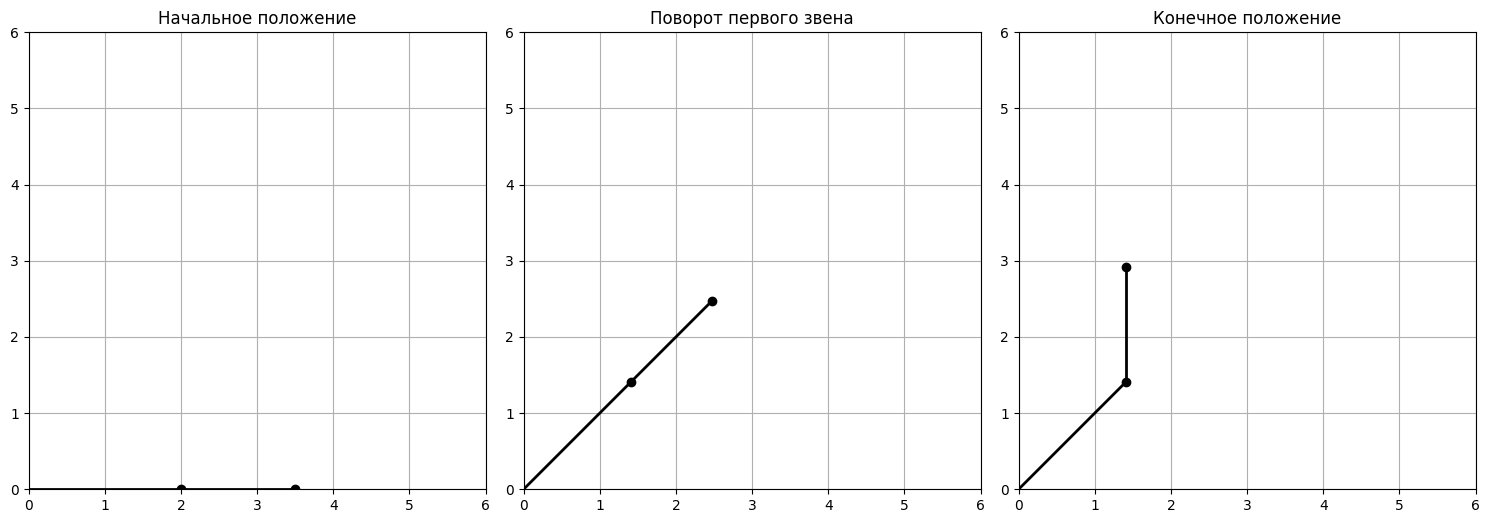

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def draw_kinematic_pair(theta1, theta2, a1, a2, ax):
    origin = np.array([0, 0])

    P1 = np.array([a1 * np.cos(theta1), a1 * np.sin(theta1)])

    P2 = P1 + np.array([a2 * np.cos(theta1 + theta2), a2 * np.sin(theta1 + theta2)])

    ax.plot([origin[0], P1[0]], [origin[1], P1[1]], 'k-', linewidth=2, label='Звено 1')
    ax.plot([P1[0], P2[0]], [P1[1], P2[1]], 'k-', linewidth=2, label='Звено 2')

    ax.plot(*P1, 'o', markersize=6, c='black')
    ax.plot(*P2, 'o', markersize=6, c='black')

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_aspect('equal')
    ax.grid(True)

# Длина звеньев
a1 = 2
a2 = 1.5

theta1_initial = 0
theta2_initial = 0
theta1_final = np.pi / 4
theta2_final = np.pi / 4

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Начальное положение
draw_kinematic_pair(theta1_initial, theta2_initial, a1, a2, axs[0])
axs[0].set_title('Начальное положение')

# Положение после поворота первого звена
draw_kinematic_pair(theta1_final, theta2_initial, a1, a2, axs[1])
axs[1].set_title('Поворот первого звена')

# Конечное положение с поворотом обоих звеньев
draw_kinematic_pair(theta1_final, theta2_final, a1, a2, axs[2])
axs[2].set_title('Конечное положение')

plt.tight_layout()
plt.show()


##Задание 6

<ipython-input-30-75cd7941ba85>:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[frame], y[frame])  # Обновляем положение точки


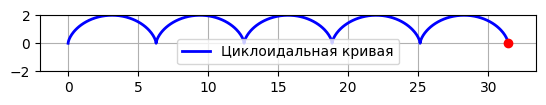

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

r = 1  # радиус
t = np.linspace(0, 10 * np.pi, 500)  # диапазон параметра t

x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))

fig, ax = plt.subplots()
ax.set_xlim(-2 * r, 10 * np.pi + 2 * r)
ax.set_ylim(-2 * r, 2 * r)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'b-', linewidth=2, label='Циклоидальная кривая')
point, = ax.plot([], [], 'ro')  # Точка, движущаяся по кривой
ax.legend()


def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point,


def update(frame):
    line.set_data(x[:frame], y[:frame])
    point.set_data(x[frame], y[frame])
    return line, point

ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, repeat=True)

ani.save('cycloid_animation.mp4', writer='ffmpeg', fps=30)

plt.show()
from google.colab import files

files.download('cycloid_animation.mp4')